<a href="https://colab.research.google.com/github/Kinyugo/Machine-Learning-Exercise-Solutions/blob/master/image_steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Required Libraries

In [0]:
import numpy as np
import cv2
import types
from google.colab.patches import cv2_imshow
from pathlib import Path

# Define Helper Functions.

In [0]:
# Function to convert data into binary
def message_to_binary(message):
  if type(message) == str:
    return ''.join([format(ord(i), "08b") for i in message])
  elif type(message) == bytes or type(message) == np.ndarray:
    return [format(i, "08b") for i in message]
  elif type(message) == int or type(message) == np.uint8:
    return format(message, "08b")
  else:
    raise TypeError("Input type not supported")

In [0]:
# Function to hide the message into the image.

def encode_data_in_image(image, message):
  """A function to encode the message in an image.

  The function hides the message in the least significant bits of the image.
  """

  # Calculate the maximum number of bytes that can be encoded in the image.
  max_bytes = image.shape[0] * image.shape[1] * 3 // 8
  print("Maximum bytes that can be encoded: ", max_bytes)

  # Check if the given message can be encoded in given image. i.e the number of
  # bytes required to encode the image are less than the max_bytes that can be 
  # encoded in the image.
  if len(message) > max_bytes:
    insufficient_bytes_error_msg = "Insufficient bytes {image_bytes} to encode a message of bytes {message_bytes}"
    raise ValueError(insufficient_bytes_error_msg.format(image_bytes = max_bytes, message_bytes = len(message)))
  
  # Delimeter to show the end of the msg.
  msg_delimeter = "#%#%0"
  message += msg_delimeter

  # Convert the message to binary format.
  binary_msg = message_to_binary(message)

  print("Binary msg: {binary_msg}".format(binary_msg=binary_msg))
  # Find length of data that needs to be encoded.
  data_len = len(binary_msg)

  # Indicates which bit of data is being encoded.
  data_index = 0

  # Perform encoding.
  for values in image:
    for pixel in values:
      # convert RGB values to binary format.
      r, g, b = message_to_binary(pixel)
      # Modify LSB if there is still data to store.
      if data_index < data_len:
        # Encode data in the LSB of the red pixel.
        pixel[0] = int(r[:-1] + binary_msg[data_index], 2)
        data_index += 1
      if data_index < data_len:
        # Encode data in the LSB of the green pixel.
        pixel[1] = int(g[:-1] + binary_msg[data_index], 2)
        data_index += 1
      if data_index < data_len:
        # Encode data in the LSB of the blue pixel
        pixel[2] = int(b[:-1] + binary_msg[data_index], 2)
        data_index += 1
      # If all data has been encoded break out of the loop.
      if data_index >= data_len:
        break;

  return image

In [0]:
# Function to decode data from image
def decode_data_from_image(image):
  """Extracts the steganographed data from the image.

  A function that reads the least significant bits of the pixel values of the
  image and extracts the data encoded in them.
  """
  binary_data = ""

  for row in image:
    for pixel in row:
      # Convert RGB values to binary format.
      r, g, b = message_to_binary(pixel)
      # Extract the LSB of the red pixel.
      binary_data += r[-1]
      # Extract the LSB of the green pixel.
      binary_data += g[-1]
      # Extract the LSB of the blue pixel
      binary_data += b[-1]

  # Split into bytes.
  msg_bytes = [binary_data[i: i+5] for i in range(0, len(binary_data), 5)]

  # Convert from bits to characters.
  decoded_data = ""
  for msg_byte in msg_bytes:
    decoded_data += chr(int(msg_byte,  2))
    # Check if we have reached the delimeter.
    if decoded_data[-5:] == "#%#%0":
      break

  # Return the decoded msg without the delimeter.
  return decoded_data[:-5]

In [0]:
# A function to perform encoding and saving of data.
def encode_data(data, img_filename, encoded_filename = ""):
  # Read the image from file.
  image = cv2.imread(img_filename)

  # Display details of the image.
  print("The shape of the image is: " + str(image.shape))
  print("The image: ")

  # Resize the image.
  resized_image = cv2.resize(image, (500, 500))

  # Display resized image.
  cv2_imshow(resized_image)

  if(len(data) == 0):
    raise ValueError("Data is empty")
  
  # If the filename to save to was not passed generate one from the existing one.
  if not encoded_filename:
    [name, ext] = Path(img_filename).name.split(".")
    encoded_filename = name + "_encoded" + "." + ext

  # Encode data in image
  encoded_image = encode_data_in_image(resized_image, data)

  # Save image to file.
  cv2.imwrite(encoded_filename, encoded_image)

In [0]:
# A function to decode data from an image file.
def decode_data(encoded_img_filename):
  # Read the encoded image.
  encoded_image = cv2.imread(encoded_img_filename)

  # Display details of the image.
  print("The shape of the image is: " + str(encoded_image.shape))
  print("The image: ")

  # Resize the image.
  resized_image = cv2.resize(encoded_image, (500, 500))

  # Display resized image.
  cv2_imshow(resized_image)

  return decode_data_from_image(encoded_image)

# Run the program

## Encode data

The shape of the image is: (2586, 3880, 3)
The image: 


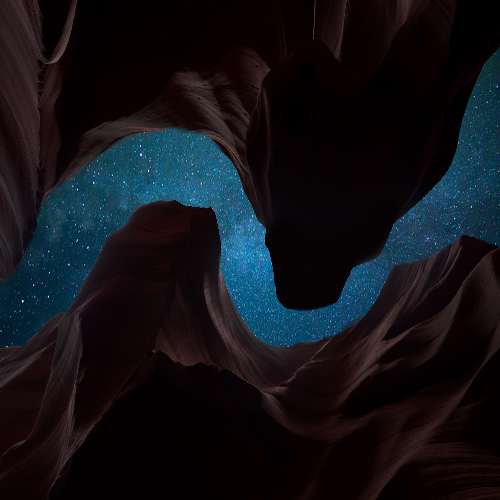

Maximum bytes that can be encoded:  93750
Binary msg: 01101000011001010110110001101100011011110010000001110111011011110111001001101100011001000010001100100101001000110010010100110000


In [130]:
# Message to encode.
message = "hello world"
img_filename = "image.jpg"

encode_data(message, img_filename)

## Decode data

The shape of the image is: (500, 500, 3)
The image: 


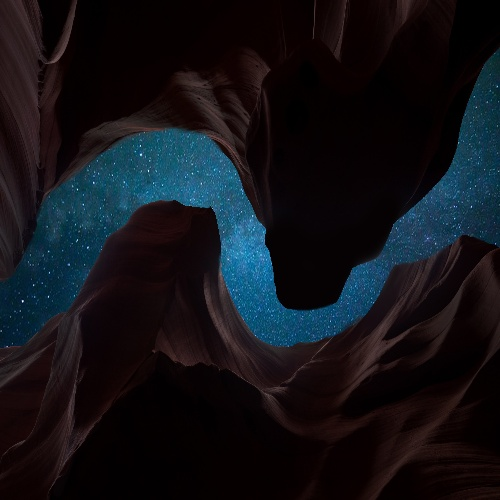

                   
                  	
        
 	                       




    

       		         	   
             
     		                   
  
  
      		                 


  
  

    	
 	     
		     	                 
       
    
     	  		   	                	  

    

	  


    
  
	
  	           		

In [131]:
encoded_img_filename = "image_encoded.jpg"
decoded_data = decode_data(encoded_img_filename)
print(decoded_data)